In [1]:
import nltk
import numpy as np
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from stempel import StempelStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups


In [2]:
LINES = ['-', ':', '--']  # Line style for plots.

In [3]:
def text_to_string(filename):
    """Read a text file and return a string."""
    with open(filename, encoding="utf8") as infile:
        return infile.read()

In [ ]:
strings = dict()
strings['sien'] = text_to_string('sien.txt')
strings['prus'] = text_to_string('prus.txt')
strings['unknown'] = text_to_string('sien_test.txt')


In [ ]:
#tokienizacja
words = dict()
for author in strings:
        tokens = nltk.word_tokenize(strings[author])
        words[author] = ([token.lower() for token in tokens
                                    if token.isalpha()])
words['sien'][:300]

In [ ]:
words_without_stopwords = []
stop_words = set(stopwords.words('polish'))
for w in words['sien']: 
    if w not in stop_words: 
        words_without_stopwords.append(w)
words_without_stopwords[:300]

In [ ]:
#stemmer
stemmer = StempelStemmer.polimorf()
stemmed_words = []
for word in words_without_stopwords:
    stems = stemmer.stem(word)
    stemmed_words.append(stems)
    #words2['sien'] = ([stem.lower()] for stem in stems)
    
stemmed_words[:300]  

In [8]:
#najkrótszy tekst
word_count = []
for author in words:
    word_count.append(len(words[author]))
    print('\nNumber of words for {} = {}\n'.
              format(author, len(words[author])))
len_shortest_corpus = min(word_count)


Number of words for sien = 58203


Number of words for prus = 13238


Number of words for unknown = 27649



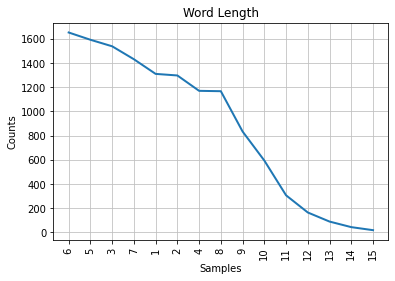

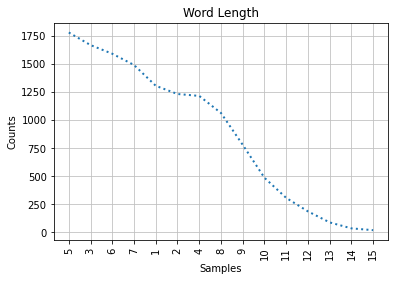

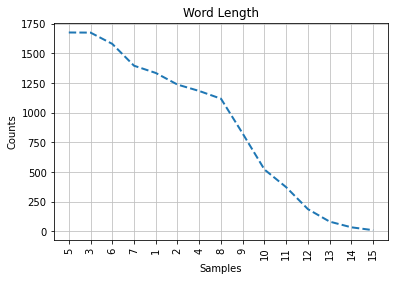

In [9]:
#długość słów
by_author_length_freq_dist = dict()
plt.figure(1)    
plt.ion()
for i, author in enumerate(words):# word to słowa wejściowe, można zamianić na stemmed_words lub words_without_stopwords 
    word_lengths = [len(word) for word in words[author]
                    [:len_shortest_corpus]]
    by_author_length_freq_dist[author] = nltk.FreqDist(word_lengths)
    by_author_length_freq_dist[author].plot(15,
                                                linestyle=LINES[i],
                                                label=author,
                                                title='Word Length')

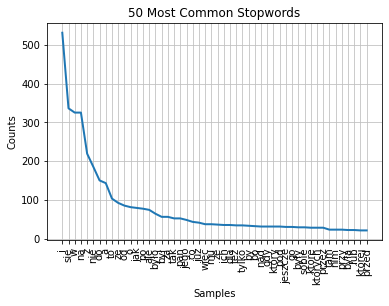

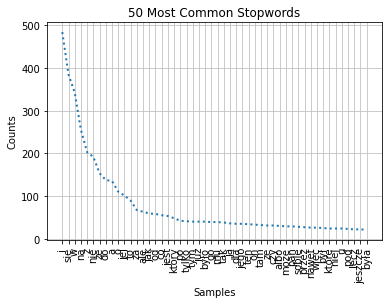

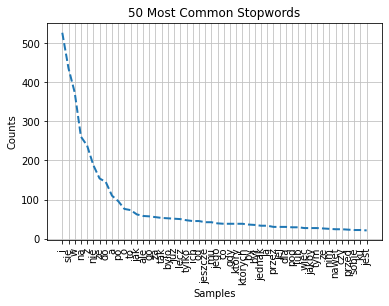

In [10]:
# częstotliwość stopwords
stopwords_by_author_freq_dist = dict()
plt.figure(2) 
stop_words = set(stopwords.words('polish'))
for i, author in enumerate(words):
    stopwords_by_author = [word for word in words[author]
                            [:len_shortest_corpus] if word in stop_words]    
    stopwords_by_author_freq_dist[author] = nltk.FreqDist(stopwords_by_author)    
    stopwords_by_author_freq_dist[author].plot(50,
                                                   label=author,
                                                   linestyle=LINES[i],
                                                   title=
                                                   '50 Most Common Stopwords')

In [11]:
#chi kwadrat
chisquared_by_author = dict()
for author in words:
    if author != 'unknown': 
        combined_corpus = (words[author] +
                           words['unknown'])
        author_proportion = (len(words[author])/
                                 len(combined_corpus))
        combined_freq_dist = nltk.FreqDist(combined_corpus)
        most_common_words = list(combined_freq_dist.most_common(1000))
        chisquared = 0
        for word, combined_count in most_common_words:
            observed_count_author = words[author].count(word) #zaobserwowana liczba wystąpienia słowa           
            expected_count_author = combined_count * author_proportion  
            chisquared += ((observed_count_author -                    
                            expected_count_author)**2 /
                            expected_count_author)
            chisquared_by_author[author] = chisquared    
        print('Chi-squared for {} = {:.1f}'.format(author, chisquared))


Chi-squared for sien = 673.8
Chi-squared for prus = 2484.5


In [12]:
#współczynnik jaccarda
jaccard_by_author = dict()
unique_words_unknown = set(words['unknown']
                             [:len_shortest_corpus])
authors = (author for author in words if author != 'unknown')    
for author in authors:
    unique_words_author = set(words[author][:len_shortest_corpus]) 
    shared_words = unique_words_author.intersection(unique_words_unknown)
    jaccard_sim = (float(len(shared_words))/ (len(unique_words_author) +
                                                  len(unique_words_unknown) -
                                                  len(shared_words)))
    jaccard_by_author[author] = jaccard_sim
    print('Jaccard Similarity for {} = {}'.format(author, jaccard_sim))

Jaccard Similarity for sien = 0.14517497348886532
Jaccard Similarity for prus = 0.1320675105485232



Loading: 100%|█████████████████████████████████████████████████████| 11368252/11368252 [00:20<00:00, 1233308.43bytes/s]